# Perceptron

The Perceptron algorithm is a linear classifier that separates data into two classes using a hyperplane. It aims to find a weight vector, $\mathbf{w}$, and a bias, $b$, such that the sign of $\mathbf{w}^T \mathbf{x} + b$ correctly classifies the input data points $\mathbf{x}$.

### Explanation
The algorithm approximates the function:
$f(\mathbf{x}) = \text{sign}(\mathbf{w}^T \mathbf{x} + b)$

Here, the step function, $\text{sign}(a)$, returns:
- $1$ if $a \geq 0$
- $-1$ if $a < 0$

When a point is misclassified, the weight vector $\mathbf{w}$ and bias $b$ are updated to adjust the hyperplane towards the misclassified point. This is done by adding or subtracting the input vector $\mathbf{x}$ scaled by the actual output $y$. 

The Perceptron performs linearly separable binary classification and is guaranteed to converge for linearly separable data. Regardless of the activation function applied, the Perceptron remains a linear operation because the decision boundary it creates is always a linear hyperplane.

![Perceptron Algorithm](https://www.sharpsightlabs.com/wp-content/uploads/2023/07/perceptron_structure_v1.png)

Source: [Sharp Sight Labs - How to Make a Python Perceptron from Scratch](https://www.sharpsightlabs.com/blog/python-perceptron-from-scratch/)


In [1]:
import random
import matplotlib.pyplot as plt 
import numpy as np

## Create Datapoints
To train the perceptron, we need to create datapoints. Ideally, these points should be random and evenly distributed above and below the line, which represents the decision boundary.

**Issue with the current implementation:** The line from which points are sampled does not cross the origin. Additionally, points are generated within a square from -20 to 20 in both the x and y directions. As a result, the area of the square may be dominated by one class, potentially skewing the predicted decision boundary. The boundary may end up being closer to one of the classification groups than intended.

**Solution:** To address this issue, we should ensure that the points are evenly distributed relative to the line, and adjust the range of point generation if necessary.

In [2]:
# classify given points as above or below the line 4x - 3y - 10 = 0
def classify_points(x, y):
    return -1 if 4*x - 3*y - 10 < 0 else 1

# create test set of 100 points with associated classtitications
def create_points():
    pts = []
    classes = []
    
    for i in range(100):
        (x, y) = random.randint(-20, 20), random.randint(-20, 20)
        pts.append((x, y))

        classes.append(classify_points(x, y))

    return pts, classes

## Visualize Data and Decision Boundary

Visualize test datapoints with ideal line equation and predicted equation

In [3]:
# Visualize the points and the line
def visualize_points_and_line(pts, classes, ideal_w, w=None):
    # Separate points by class
    class1_pts = [pt for pt, cls in zip(pts, classes) if cls == 1]
    class_neg1_pts = [pt for pt, cls in zip(pts, classes) if cls == -1]

    # Plot points
    plt.figure(figsize=(10, 6))
    if class1_pts:
        plt.scatter(*zip(*class1_pts), c='b', label='Class 1')
    if class_neg1_pts:
        plt.scatter(*zip(*class_neg1_pts), c='r', label='Class -1')

    # Plot the ideal line
    x_vals = np.linspace(-20, 20, 400)
    y_vals = (ideal_w[0] * x_vals - ideal_w[2]) / ideal_w[1]
    plt.plot(x_vals, y_vals, 'g', label='Ideal Line')

    # Plot the predicted line if w is provided
    if w is not None:
        y_vals_w = (-w[0] * x_vals - w[2]) / w[1]
        plt.plot(x_vals, y_vals_w, 'b--', label='Predicted Line')

    # Add labels and legend
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Random Points and the Expected Line')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.show()

## Perceptron Training & Implementation

**Perceptron Algorithm**
1. initialize weight and bias to 0
2. Until convergence, iterate through each point in the train set
   1. *Estimate output*: predict activation, a, by applying sign(wTx + b)
   2. *Estimate error*: if actual activation, y, multiplied by predicted, a, is < 0, misclassification
   3. *Adjust weight and bias*: if point misclassified, update w = w_d + y*x_d for every d element in w, b = b + y

In [4]:
# step function activation, -1 if less than 0 else 1
def activation_step_func(a):
    return -1 if a < 0 else 1

def perceptron_train(w, pts, classes):
    for i in range(len(pts)):
    
        # actual activation
        y = classes[i]
    
        x = []
    
        # pt selected
        pt = pts[i]
    
        # Create input vector with bias term included
        x = np.append(pt, 1)
        
        a = np.dot(w, x)
    
        # assign class of point using step function activation (can replace with other activations)
        a_sign = activation_step_func(a)
    
        # if mismatch, adjust w vector according to perceptron algorithm (another variation adjust weight after iterating through 
        # multiple other points)
        if y*a_sign < 0:
            
            for j in range(len(w) - 1):
                w[j] += y * pt[j]
            w[-1] += y

    return w

Train perceptron until convergence. In this implementation arbitrarily set to 60, can programmatically check for convergence. Display results. 

Predicted: [ 0.39052297 -0.29111713 -0.87335138]
Ideal: [0.35777088 0.26832816 0.89442719]


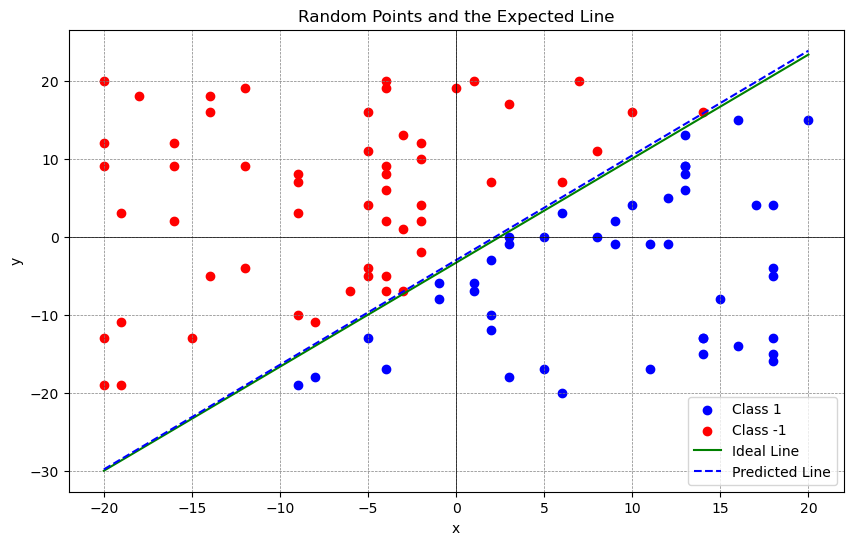

In [5]:
def normalize_weights(w):
    norm = np.linalg.norm(w)
    if norm != 0:
        w /= norm
    return w

def main():

    # number of input variables
    num_var = 2
    
    # set of training points
    pts = []
    
    # corresponding class of training points
    classes = []
    
    pts, classes = create_points()

    # find w vector
    w = np.zeros(num_var + 1)
    
    for i in range(60):
        w = perceptron_train(w, pts, classes)
    
    w = normalize_weights(w)
    ideal_w = normalize_weights([4, 3, 10])

    # display w vector against ideal w vector
    print(f"Predicted: {w}")
    print(f"Ideal: {ideal_w}")
    
    visualize_points_and_line(pts, classes, ideal_w, w)

main()

**Other Variations/Additions**
- Non-Zero initialization
  - may lead to faster convergence, however, will converge regardless of initialization if data linearly separable 
- Weighted perceptron, Voted Perceptron
  - may lead to faster convergence
- Alternative activation function (sigmoid, tanh)
  - may not make a difference compared to step activation function
- Multiclass classification